In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy
from scipy.signal import convolve
from scipy import ndimage
from getBayer import getBayer, bayerGrid
% matplotlib inline
import io
import time
from numpy.lib.stride_tricks import as_strided

In [28]:
rgbIm = getBayer('wall2.pickle')
kernel = np.ones((3,3),dtype=np.uint8)
bayer_conv = np.zeros(bayerGrid.shape, dtype=np.uint8)
for i in range(3):
    bayer_conv[:,:,i] = convolve(bayerGrid[:,:,i], kernel, mode='same')
rgbConv = np.zeros(rgbIm.shape, dtype=np.uint16)  # max sum here should be 1275 for 5 maxed green sencels
for i in range(3):
    rgbConv[:,:,i] = convolve(rgbIm[:,:,i].astype(np.uint16), kernel, mode='same')
    
res = rgbConv / bayer_conv
res = res.astype(np.uint8)
import copy
testIm = copy.deepcopy(res)



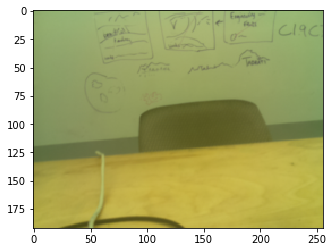

In [39]:
testIm = np.array(Image.open("wall1.jpeg"))
testIm = scipy.misc.imresize(testIm, .25)
plt.imshow(testIm)

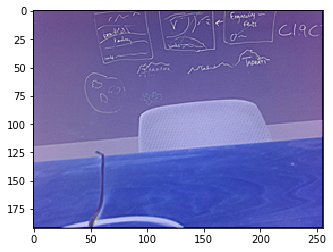

In [40]:
sharpen = np.array([[0, -1, 0 ], [-1, 5, -1], [0, -1, 0]])
sharpIm = np.zeros(testIm.shape, dtype=np.float32)
for i in range(3):
    sharpIm[:,:,i] = convolve(testIm[:,:,i].astype(np.float32), sharpen.astype(np.float32), mode='same')
sharpIm[sharpIm < 0] = 0
sharpIm[sharpIm > 255] = 255
plt.imshow(sharpIm.astype(np.float32))

In [38]:
np.max(sharpIm)

255.0

In [18]:
a = np.float32(.9)

In [19]:
a

0.89999998

In [20]:
a.astype(np.int16)

0

In [9]:
bad.astype(np.int16)

array([[[229, 229, 229],
        [229, 229, 229],
        [229, 229, 229],
        ..., 
        [229, 229, 229],
        [229, 229, 229],
        [229, 229, 229]],

       [[229, 229, 229],
        [133, 153,  98],
        [121, 158,  97],
        ..., 
        [143, 170, 103],
        [131, 163,  91],
        [229, 229, 229]],

       [[229, 229, 229],
        [119, 134,  75],
        [127, 138,  83],
        ..., 
        [126, 156,  95],
        [117, 151,  87],
        [229, 229, 229]],

       ..., 
       [[229, 229, 229],
        [162, 154,  56],
        [164, 157,  54],
        ..., 
        [169, 154,  76],
        [153, 162,  49],
        [229, 229, 186]],

       [[229, 229, 229],
        [135, 132,  45],
        [169, 166,  86],
        ..., 
        [153, 142,  59],
        [172, 161,  59],
        [229, 229, 178]],

       [[229, 229, 229],
        [229, 229, 229],
        [229, 229, 229],
        ..., 
        [229, 229, 229],
        [229, 229, 213],
        [229, 229,

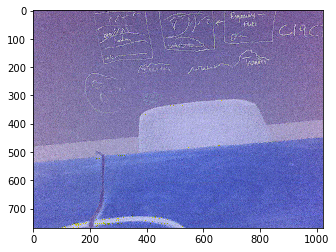

In [10]:
plt.imshow(bad.astype(np.int16))

In [11]:
type(sharpIm)

numpy.ndarray

In [12]:
np.max(sharpIm)

255.0

In [13]:
0b111111111

511

In [14]:
np.max(testIm.astype(np.uint64))

207